# Linear Regression

## Set Directory and Import Libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from statsmodels.formula.api import ols # Import the ols function

data = Path('C:/Users/Abdul Rauf Maroof/OneDrive/Documents/MSBA/data_sets')
taiwan_real_estate = pd.read_csv(data/'taiwan_real_estate2.csv')

## Linear Regression

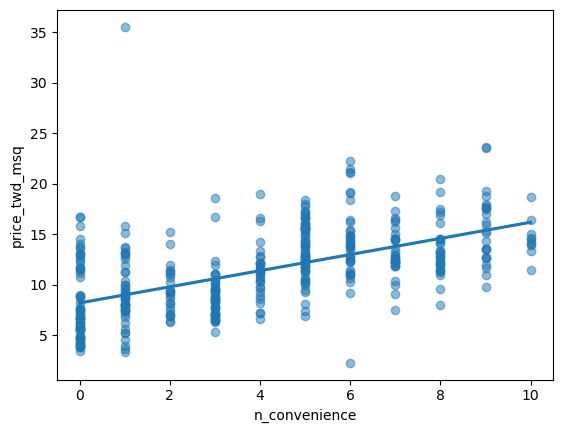

In [13]:
# Draw a trend line on the scatter plot of price_twd_msq vs. n_convenience
sns.regplot(x='n_convenience',
         y='price_twd_msq',
         data=taiwan_real_estate,
         ci=True,
         scatter_kws={'alpha': 0.5})
plt.show()

In [26]:
# Create the model object
mdl_price_vs_conv = ols("price_twd_msq ~ n_convenience", data=taiwan_real_estate)
# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()
# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


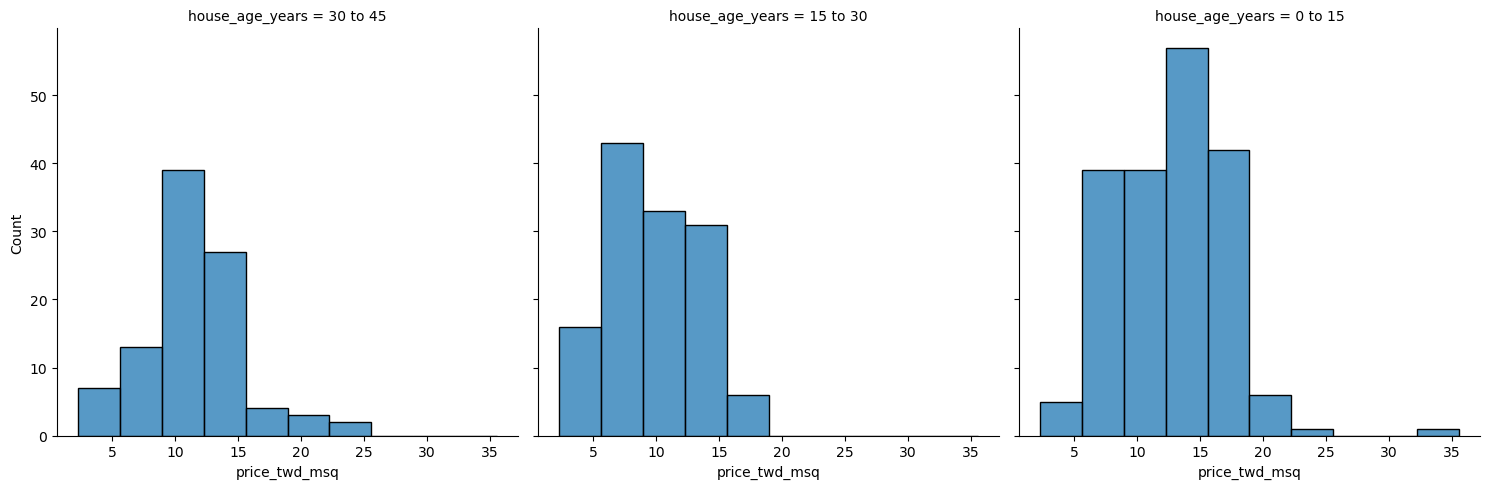

In [16]:
# Histograms of price_twd_msq with 10 bins, split by the age of each house
sns.displot(data=taiwan_real_estate,
         x='price_twd_msq',
         bins=10,
         col='house_age_years')

# Show the plot
plt.show()

In [18]:
# Calculate the mean of price_twd_msq, grouped by house age
mean_price_by_age = taiwan_real_estate.groupby(['house_age_years'])['price_twd_msq'].mean()
# Print the result
print(mean_price_by_age)

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64


In [25]:
# Create the model object
mdl_price_vs_age = ols("price_twd_msq ~ house_age_years + 0", data=taiwan_real_estate)
# Fit the model
mdl_price_vs_conv = mdl_price_vs_age.fit()
# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


In [29]:
# Create the explanatory_data 
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0,11)})
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)
# Create prediction_data
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_conv.predict(explanatory_data))
# Print it
print(prediction_data)

    n_convenience  price_twd_msq
0               0       8.224237
1               1       9.022317
2               2       9.820397
3               3      10.618477
4               4      11.416556
5               5      12.214636
6               6      13.012716
7               7      13.810795
8               8      14.608875
9               9      15.406955
10             10      16.205035


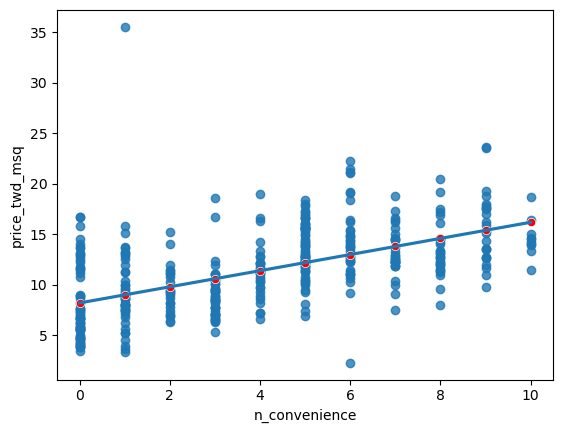

In [30]:
# Create a new figure, fig
fig = plt.figure()
sns.regplot(x="n_convenience",
            y="price_twd_msq",
            data=taiwan_real_estate,
            ci=None)
# Add a scatter plot layer to the regplot
sns.scatterplot(x="n_convenience",
            y="price_twd_msq",
            data=prediction_data,
            color='red')

# Show the layered plot
plt.show()

In [32]:
impossible = pd.DataFrame({'n_convenience':[-1,2.5]})
print(impossible)
mdl_price_vs_conv.predict(impossible)

   n_convenience
0           -1.0
1            2.5


0     7.426158
1    10.219437
dtype: float64